<a href="https://colab.research.google.com/github/Supassara-pmp/Coursework/blob/main/Dimensionally_Reduction_Using_PCA_and_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment#5 : การทำ Dimensionality Reduction และการจัดกลุ่มด้วย Kmeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# define random state to be used in every model
RANDOM_STATE = 17

### ชุดข้อมูลประกอบด้วย 4 files โดยมีการแบ่งเป็น train และ test data มาให้ (แก้ไข path ข้อมูลเป็นไปตามเครื่องของนักศึกษา)

In [ ]:
# define path to the data files
PATH_TO_DATA = "/content/drive/MyDrive/CS345/Assignment 5/data"

In [ ]:
#load data to the program
X_train = np.loadtxt(PATH_TO_DATA + "/data_train.txt")
y_train = np.loadtxt(PATH_TO_DATA + "/data_train_labels.txt").astype(int)

X_test = np.loadtxt(PATH_TO_DATA + "/data_test.txt")
y_test = np.loadtxt(PATH_TO_DATA + "/data_test_labels.txt").astype(int)

In [ ]:
#check dimension of training and test dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(7352, 561) (7352,)
(2947, 561) (2947,)


# **คำสั่งที่** 1:
### ให้รวมข้อมูลจาก training กับ test เข้าด้วยกัน โดยรวม X_train กับ X_test เป็น X และรวม y_train กับ y_test เป็น y


In [ ]:
# เติมโค้ดตรงส่วนนี้  ============================
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

print('Shape of data set X:', X.shape)
print('\nShape of target y:', y.shape)

Shape of data set X: (10299, 561)

Shape of target y: (10299,)


In [ ]:
print(X)

[[ 0.28858451 -0.02029417 -0.13290514 ... -0.84124676  0.17994061
  -0.05862692]
 [ 0.27841883 -0.01641057 -0.12352019 ... -0.8447876   0.18028889
  -0.05431672]
 [ 0.27965306 -0.01946716 -0.11346169 ... -0.84893347  0.18063731
  -0.04911782]
 ...
 [ 0.34996609  0.03007744 -0.11578796 ... -0.65535684  0.27447878
   0.18118355]
 [ 0.23759383  0.01846687 -0.09649893 ... -0.65971859  0.26478161
   0.18756291]
 [ 0.15362719 -0.01843651 -0.13701846 ... -0.66008023  0.26393619
   0.1881034 ]]


In [ ]:
print(y)

[5 5 5 ... 2 2 2]


รันโค้ดด้านล่างนี้ เพื่อแสดงค่าที่แตกต่าางกันของ target class.




In [ ]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [ ]:
n_classes = np.unique(y).size
print (n_classes)

6


ความหมายของ labels เหล่านี้คือ :

1 – walking 2 – walking upstairs 3 – walking downstairs 4 – sitting 5 – standing 6 – laying down

# **คำสังที่** 2:
### ให้ปรับ Scale ของข้อมูลใน X ด้วย  StandardScaler

In [ ]:
# เติมโค้ดตรงส่วนนี้ =================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
print(X_scaled)

(10299, 561)
[[ 2.10533854e-01 -6.87026385e-02 -4.52194533e-01 ... -6.74432366e-01
   3.82007658e-01 -1.61505480e-02]
 [ 6.02084832e-02  3.59023537e-02 -2.75221885e-01 ... -6.81359801e-01
   3.83147865e-01 -1.20627169e-04]
 [ 7.84597052e-02 -4.64269585e-02 -8.55480582e-02 ... -6.89470939e-01
   3.84288531e-01  1.92144041e-02]
 ...
 [ 1.11821625e+00  1.28805864e+00 -1.29414692e-01 ... -3.10750224e-01
   6.91509049e-01  8.75719123e-01]
 [-5.43492722e-01  9.75327452e-01  2.34319837e-01 ... -3.19283719e-01
   6.59762215e-01  8.99444350e-01]
 [-1.78515253e+00 -1.86663622e-02 -5.29759691e-01 ... -3.19991245e-01
   6.56994458e-01  9.01454465e-01]]


# **คำสั่งที่** 3:
### ให้ใช้อัลกอริทึม PCA ในการลดขนาดของ dimensions โดยให้เหลือจำนวน components เท่าที่จำเป็น เพื่อที่จะสามารถอธิบายข้อมูลเดิมที่ปรับ scale แล้วให้ได้อย่างน้อย 90% ด้วยการใช้พารามิเตอร์ n_components ใน PCA และให้ใส่ค่า random_state = RANDOM_STATE ด้วย

In [ ]:
# เติมโค้ดตรงส่วนนี้ =================================
from sklearn.decomposition import PCA

pca = PCA(n_components=65, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

print('Percentage of explained variance with 65 components is {:.1f}'.format(pca.explained_variance_ratio_.sum()*100), '%')
# n_components = 56 -> 88.4 %
# n_components = 65 -> 90.0 %
# n_components = 66 -> 90.2 %
# n_components = 193 -> 99.2 %

Percentage of explained variance with 65 components is 90.0 %


# **คำสั่งที่** 4:
### ให้พิมพ์ค่าจำนวน components ที่ต้องใช้เพื่อให้สามารถอธิบายข้อมูลเดิมที่ปรับ scale แล้วได้ 90%


(Hint : 56 หรือ 65 หรือ 66 หรือ 193)

In [ ]:
#เติมโค้ดตรงส่วนนี้ ===============================
print('n_components =', pca.n_components_)

n_components = 65


# **คำสั่งที่** 5:

### ให้แสดง % ของค่า variance ที่ first principal component สามารถอธิบายได้


(Hint: ตัวแปร explained_variance_ratio ของ pca)

In [ ]:
# เติมโค้ดตรงส่วนนี้ =================================
print('{:.2f}' .format(pca.explained_variance_ratio_[0]*100),'%')

50.74 %


In [ ]:
print(X_pca.shape)
print(X_pca)

(10299, 65)
[[-16.38097982   1.99508357   3.41567801 ...   0.06910744   2.18109628
   -0.04713789]
 [-15.58217328   1.18259351  -0.32121494 ...   0.02646597   0.26278386
    0.18427927]
 [-15.42398918   2.24316632  -1.23778496 ...  -1.31198554  -0.54855456
   -0.35398093]
 ...
 [ 11.84685312  -3.43356566   2.1880148  ...  -0.96018394  -1.30282438
    4.04142626]
 [  8.20668637  -4.3864888    1.31871882 ...  -1.12300479  -0.3887099
   -0.13428559]
 [  9.31117251  -3.98616157   1.93301562 ...  -2.46471658   0.77210357
    2.41246084]]


# **คำสั่งที่** 6:
### Visualize ข้อมูลที่ถูก plot ใหม่ด้วยสอง components แรก

In [ ]:
principle_1st = X_pca[:, 0]
princicple_2nd = X_pca[:, 1]

print('The first principle component:')
print(principle_1st)

print('\nThe second principle component:')
print(princicple_2nd)

The first principle component:
[-16.38097982 -15.58217328 -15.42398918 ...  11.84685312   8.20668637
   9.31117251]

The second principle component:
[ 1.99508357  1.18259351  2.24316632 ... -3.43356566 -4.3864888
 -3.98616157]


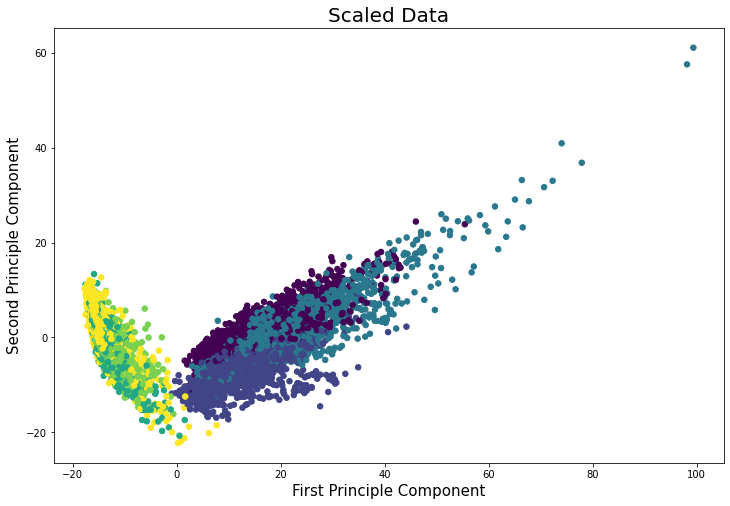

In [ ]:
# เติมโค้ดตรงส่วนนี้ ==================================================
plt.figure(figsize=(12, 8))
scatter = plt.scatter(principle_1st, princicple_2nd, c=y, s=30, cmap='viridis')
plt.title('Scaled Data', fontsize=20)
plt.xlabel('First Principle Component', fontsize=15)
plt.ylabel('Second Principle Component', fontsize=15)
plt.show()

# **คำสั่งที่** 7:
### ใช้ Kmeans ในการทำ clustering โดยใช้ข้อมูลที่ลดขนาด dimensions ด้วย PCA แล้ว (ในที่นี้เราพอรู้จากข้อมูลบ้างแล้วว่าจำนวนกิจกรรมที่มีจริงคือ 6 ตามจำนวน class labels ในชุดข้อมูล จึงควรแบ่งด้วย n_clusters = 6 แต่ในความเป็นจริงการเรียนรู้แบบไม่มีผู้สอน เราจะไม่รู้จำนวน clusters ล่วงหน้า)

กำหนดให้ใช้พารามิเตอร์ของ Kmeans ดังนี้

*   n_clusters = n_classes (number of unique labels of the target class)
*   n_init = 100
*   random_state = RANDOM_STATE (for the reproducibility of the result)

นอกนั้นใช้ค่า default values.

In [ ]:
# เติมโค้ดตรงส่วนนี้ =====================================
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_classes, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)

KMeans(n_clusters=6, n_init=100, random_state=17)

# **คำสั่งที่ 8:**

### Visualize ข้อมูลด้วยสอง components แรก แสดงสีของข้อมูลตามคลัสเตอร์ที่ถูกแบ่ง

In [ ]:
y_kmeans = kmeans.predict(X_pca)
y_kmeans

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

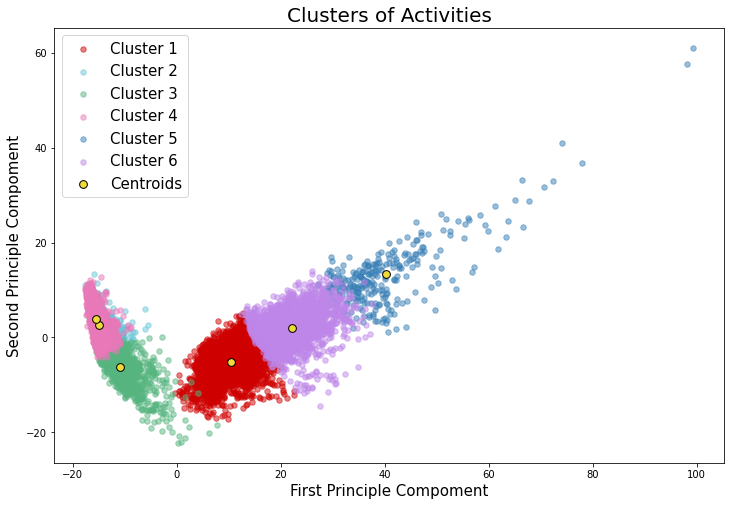

In [ ]:
# เติมโค้ดตรงส่วนนี้ ===================================
plt.figure(figsize=(12,8))
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=30, c='#CF0000', label='Cluster 1', alpha=0.5)
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=30, c='#67C6D8', label='Cluster 2', alpha=0.5)
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=30, c='#56B57F', label='Cluster 3', alpha=0.5)
plt.scatter(X_pca[y_kmeans==3, 0], X_pca[y_kmeans==3, 1], s=30, c='#E978B8', label='Cluster 4', alpha=0.5)
plt.scatter(X_pca[y_kmeans==4, 0], X_pca[y_kmeans==4, 1], s=30, c='#377FB6', label='Cluster 5', alpha=0.5)
plt.scatter(X_pca[y_kmeans==5, 0], X_pca[y_kmeans==5, 1], s=30, c='#BE86E9', label='Cluster 6', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, c='#F0DA39', label='Centroids', edgecolors='black')
plt.title('Clusters of Activities', fontsize=20)
plt.xlabel('First Principle Compoment', fontsize=15)
plt.ylabel('Second Principle Compoment', fontsize=15)
plt.legend(fontsize=15)
plt.show()

###  เปรียบเทียบผลลัพธ์ของการจัดกลุ่มด้วย Kmeans กับ activity จริง ด้วยตาราง โดยรันโค้ดด้านล่างนี้

In [ ]:
cluster_labels = kmeans.labels_

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,904,0,0,0,78,740,1722
going up the stairs,1242,0,2,0,5,295,1544
going down the stairs,320,0,0,0,196,890,1406
sitting,1,1235,450,91,0,0,1777
standing,0,1344,562,0,0,0,1906
lying,5,53,329,1557,0,0,1944
all,2472,2632,1343,1648,279,1925,10299


จะเห็นได้ว่าในแต่ละ activity class ข้อมูลจะถูกระจายอยู่ในหลาย clusters
ลองหาค่า % สูงสุดของข้อมูลสำหรับแต่ละ activity class ที่ถูกจัดให้อยู่ในคลัสเตอร์ใดคลัสเตอร์หนึ่ง เพื่อดูน้ำหนักการกระจายตัวของคลาสไปตาม cluster

ตัวอย่างเช่น ถ้าคลาส "going down the stairs" ซึ่งมีข้อมูลทั้งหมด 1406 ตัว จะกระจายอยู่ในแต่ละคลัสเตอร์เท่าใด สมมติว่าอยู่ใน


*   cluster 1 จำนวน 900

*   cluster 3 จำนวน 500


*   cluster 6 จำนวน 6

ดังนั้น %ของข้อมูลสูงสุดที่ถูกจัดให้อยู่ในคลัสเตอร์ใดคลัสเตอร์หนึ่งคือ 900/1406 = 0.64


### รันโค้ดด้านล่างนี้ สังเกตผล

In [ ]:
pd.Series(tab.iloc[:-1,:-1].max(axis=1).values / tab.iloc[:-1,-1].values, index=tab.index[:-1])

walking                  0.524971
going up the stairs      0.804404
going down the stairs    0.633001
sitting                  0.694992
standing                 0.705142
lying                    0.800926
dtype: float64

# **คำสั่งที่ 9:**
### จากผลที่ได้ แสดงว่า Kmeans ไม่ได้แยก activities เป็น 6 กลุ่มได้ดีนัก ให้ลองใช้ elbow method ในการหาจำนวนคลัสเตอร์ที่เหมาะสม แสดงกราฟของ elbow method

In [ ]:
# เติมโค้ดตรงส่วนนี้ ================================================
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init=100, random_state=RANDOM_STATE)
  kmeans.fit(X_pca)
  wcss.append(kmeans.inertia_)
wcss

[5198717.333360579,
 2693885.8110842286,
 2342379.871656442,
 2203105.399847372,
 2077034.6191247667,
 1999522.5861772997,
 1942278.176624792,
 1888446.042931893,
 1837785.4201928924,
 1796094.2595688973]

In [ ]:
pip install git+https://github.com/arvkevi/kneed

  Cloning https://github.com/arvkevi/kneed to /tmp/pip-req-build-wrldf5q0
  Running command git clone -q https://github.com/arvkevi/kneed /tmp/pip-req-build-wrldf5q0
  Created wheel for kneed: filename=kneed-0.7.0-py2.py3-none-any.whl size=10047 sha256=0c4dee0be6f26b1de81ca0df572dbb9757ca61120e55c498ef02aa4dd8245de2
  Stored in directory: /tmp/pip-ephem-wheel-cache-2_36r_lj/wheels/26/28/29/a69ed0a21841b051c1719f12d6eb1e8e9da2083c6a504222a4
Successfully built kneed


In [ ]:
#Elbow method หา k cluster ที่มีการ drop ค่า RSS มากที่สุด
from kneed import KneeLocator

kn = KneeLocator(np.arange(1,11), wcss, curve='convex', direction='decreasing')
elbow_point = kn.elbow

#แสดง elbow point
print('The elbow point is ', elbow_point)

The elbow point is  2


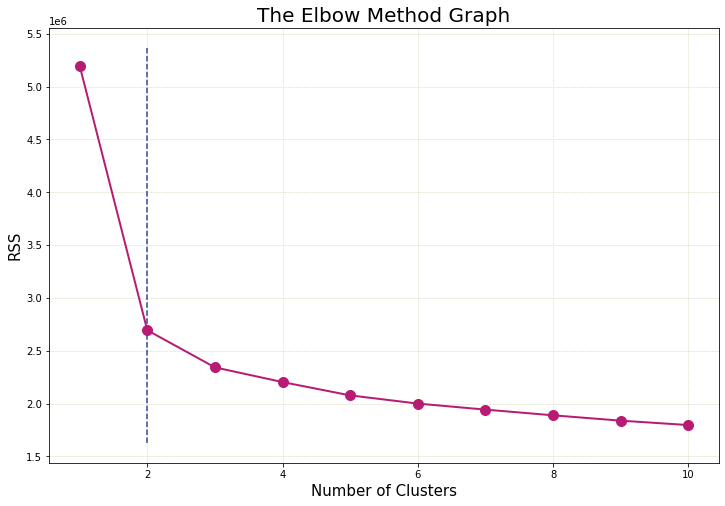

In [ ]:
plt.figure(figsize=(12,8))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
#Plot RSS ของแต่ละ k clusters
plt.plot(np.arange(1,11), wcss, linewidth=2, marker='o', ms=10, color='#B81B73')
#Plot elbow point = 2
plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='#2D4A8F')

plt.title('The Elbow Method Graph', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('RSS', fontsize=15)
plt.show()

#**คำสั่งที่** 10
### 10.1 รัน Kmeans ใหม่ด้วยจำนวนคลัสเตอร์ที่ได้จาก Elbow method โดยใช้พารามิเตอร์ชุดเดิม แต่เปลี่ยนแค่ค่า n_clusters


In [ ]:
# เติมโค้ดตรงส่วนนี้ ================================================
# ทำการ clustering ด้วย n_clusters = 2 จาก elbow method
kmeans = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)

KMeans(n_clusters=2, n_init=100, random_state=17)

In [ ]:
y_kmeans = kmeans.fit_predict(X_pca)
y_kmeans

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

### 10.2 Plot กราฟการกระจายตัวของข้อมูลที่ได้ พร้อม cluster center

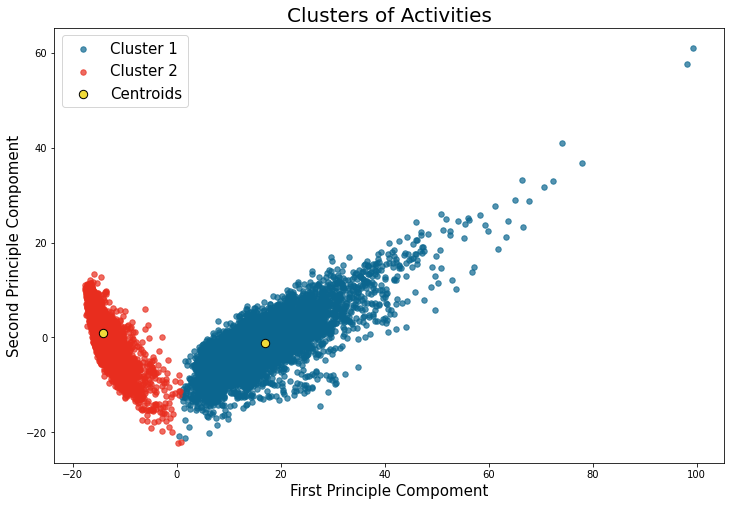

In [ ]:
# เติมโค้ดตรงส่วนนี้ ================================================
plt.figure(figsize=(12,8))
#Plot cluster 1
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=30, c='#0B668F', label='Cluster 1', alpha=0.7)
#Plot cluster 2
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=30, c='#E82D1E', label='Cluster 2', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='#F0DA39', label='Centroids', edgecolors='black')
plt.title('Clusters of Activities', fontsize=20)
plt.xlabel('First Principle Compoment', fontsize=15)
plt.ylabel('Second Principle Compoment', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
cluster_labels = kmeans.labels_

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(2)] + ['all']
tab

,cluster1,cluster2,all
walking,1722,0,1722
going up the stairs,1536,8,1544
going down the stairs,1406,0,1406
sitting,3,1774,1777
standing,0,1906,1906
lying,12,1932,1944
all,4679,5620,10299


In [ ]:
pd.Series(tab.iloc[:-1,:-1].max(axis=1).values / tab.iloc[:-1,-1].values, index=tab.index[:-1])

walking                  1.000000
going up the stairs      0.994819
going down the stairs    1.000000
sitting                  0.998312
standing                 1.000000
lying                    0.993827
dtype: float64

### 10.3 ให้สรุปลักษณะเด่นของคลัสเตอร์ที่ได้ โดยเขียนเป็น comments ด้านล่างนี้ (จำนวนคลัสเตอร์ที่ได้ วิเคราะห์ปและอธิบายลักษณะเด่นของแต่ละคลัสเตอร์)

คำตอบ:

จากการใช้ Elbow Method พบว่า elbow point ที่ให้ค่า RSS ดีที่สุด(น้อยที่สุด) คือ n_clusters = 2 ดังนั้นจึงสามารถแบ่ง clustering ได้ทั้งหมด 2  clusters ซึ่งแต่ละ activity class มีการกระจายตัวอยู่ในคลัสเตอร์ใดคลัสเตอร์หนึ่งอย่างชัดเจนและเกิด errors น้อย

โดย Cluster 1 นั้นประกอบไปด้วย activities: walking(การเดิน), going up the stairs(การขึ้นบันได), going down the stairs(การลงบันได) ซึ่งสรุปได้ว่า **Cluster 1 เป็นกลุ่มของกิจกรรมที่มีการเคลื่อนไหวแบบเคลื่อนที่(mobile movement)**

ในทางกลับกัน Cluster 2 นั้นประกอบไปด้วย acitivties: sitting(การนั่ง), standing(การยืน), lying(การนอน) ซึ่งสรุปได้ว่า **Cluster 2 เป็นกลุ่มของกิจกรรมที่มีการเคลื่อนไหวแบบไม่เคลื่อนที่ (immobile movement)**

